Last Updated 08-07-2017

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Arithmetic-and-Aggregation" data-toc-modified-id="Arithmetic-and-Aggregation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Arithmetic and Aggregation</a></div><div class="lev2 toc-item"><a href="#Arithmetic" data-toc-modified-id="Arithmetic-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Arithmetic</a></div><div class="lev3 toc-item"><a href="#Mathematical-Functions" data-toc-modified-id="Mathematical-Functions-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Mathematical Functions</a></div><div class="lev2 toc-item"><a href="#Aggregation" data-toc-modified-id="Aggregation-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Aggregation</a></div><div class="lev3 toc-item"><a href="#Examining-a-dataset-with-Pandas-and-Seaborn" data-toc-modified-id="Examining-a-dataset-with-Pandas-and-Seaborn-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Examining a dataset with Pandas and Seaborn</a></div><div class="lev3 toc-item"><a href="#Probability-of-freeze-by-calendar-day" data-toc-modified-id="Probability-of-freeze-by-calendar-day-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Probability of freeze by calendar day</a></div><div class="lev3 toc-item"><a href="#Daily-averaging" data-toc-modified-id="Daily-averaging-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Daily averaging</a></div><div class="lev3 toc-item"><a href="#Calculate-daily-anomalies" data-toc-modified-id="Calculate-daily-anomalies-124"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Calculate daily anomalies</a></div><div class="lev2 toc-item"><a href="#Key-Points" data-toc-modified-id="Key-Points-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Key Points</a></div>

# Arithmetic and Aggregation

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (12, 15)
import numpy as np
import pandas as pd
import seaborn as sns
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

hv.notebook_extension()

## Arithmetic
Suppose we want to plot the difference in eastward wind between January 1 in 2000 versus January 31 2000. We can do this by taking advantage of xarray’s labeled dimensions to simplify arithmetic operations on DataArray objects:


In [2]:
dset = xr.open_dataset('/home/abanihi/Documents/climate-data/global-hourly-0.5-degree-Air-Temperature-ds193.0/MERRA_T2M_2000-01.nc')

In [3]:
dset

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 744)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T00:29:59.971200 ...
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 -177.25 ...
Data variables:
    T2M      (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    source_file:  This product is developed based on MERRA hourly reanalysis ...
    institution:  A. Wang is at the Institute of Atmospheric Physics in Beiji...
    references:    Wang and Zeng, 2013, J. Climate, Volume: 26, Pages:7676-76...

In [4]:
temperature1 = dset['T2M'].isel(time=0)
temperature2 = dset['T2M'].isel(time=743)

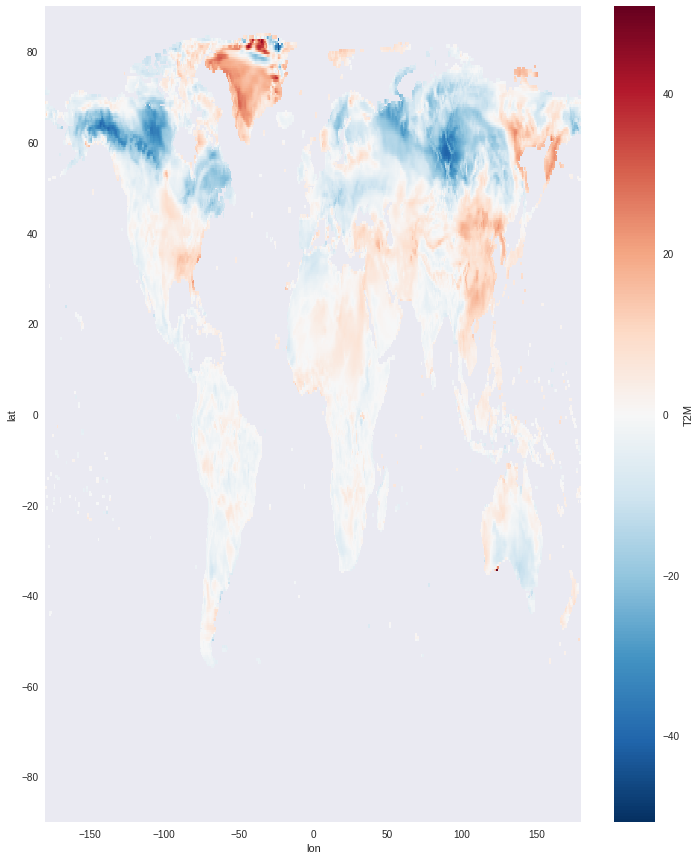

In [5]:
delta = temperature1 - temperature2
delta.plot()

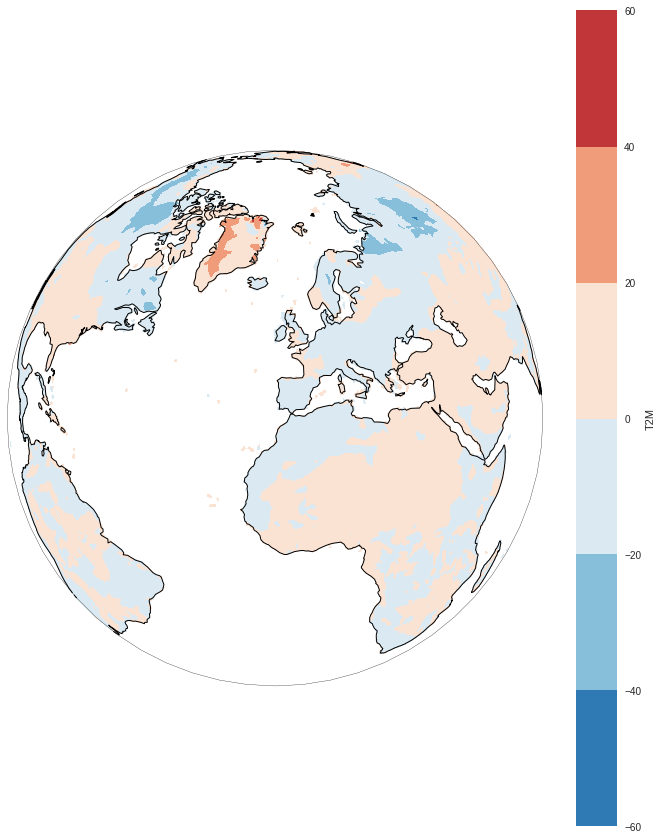

In [6]:
ax = plt.axes(projection=crs.Orthographic(-10, 35))
delta.plot.contourf(ax=ax, transform=crs.PlateCarree());
ax.set_global(); ax.coastlines();

### Mathematical Functions

Now, sometimes we need to apply mathematical functions to array data in our analysis. A good example is wind data, which are often distributed as orthogonal “u” and “v” wind components. To calculate the wind magnitude we need to take the square root of the sum of the squares. For this we use numpy ufunc commands that can operate on a DataArray. Let’s look at our wind datasets:

In [7]:
wind = xr.open_mfdataset(['/home/abanihi/Documents/climate-data/CMIP/CMIP5/NCAR/CCSM4/decadal2006/mon/Amon/r9i2p1/ua_Amon_CCSM4_decadal2006_r9i2p1_200601-203512.nc',
                          '/home/abanihi/Documents/climate-data/CMIP/CMIP5/NCAR/CCSM4/decadal2006/mon/Amon/r9i2p1/va_Amon_CCSM4_decadal2006_r9i2p1_200601-203512.nc'])\
         .sel(time='2006-01-16T12:00:00', plev=1e+05)

In [8]:
wind

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288)
Coordinates:
    time       datetime64[ns] 2006-01-16T12:00:00
    plev       float64 1e+05
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (bnds) float64 0.0 31.0
    lat_bnds   (lat, bnds) float64 -90.0 -89.53 -89.53 -88.59 -88.59 -87.64 ...
    lon_bnds   (lon, bnds) float64 -0.625 0.625 0.625 1.875 1.875 3.125 ...
    ua         (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...
    va         (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                decadal2006
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:           

In [9]:
import xarray.ufuncs as xu

In [10]:
windspeed = xu.sqrt(wind.ua**2+wind.va**2)

In [11]:
windspeed.coords

Coordinates:
    time     datetime64[ns] 2006-01-16T12:00:00
    plev     float64 1e+05
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...

In [12]:
wind.ua.values.shape

(192, 288)

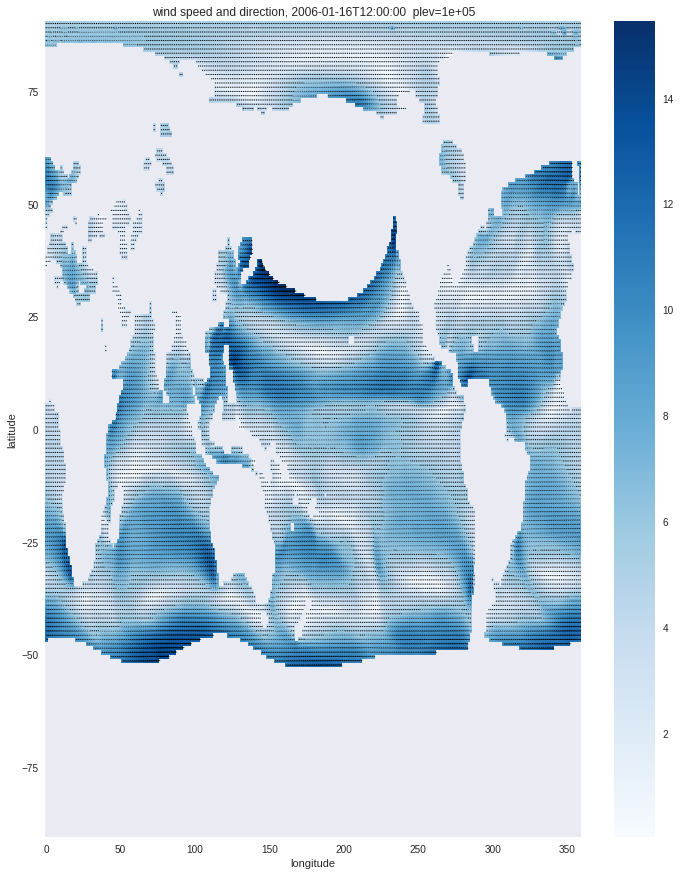

In [13]:
windspeed.plot(cmap=plt.cm.Blues)
plt.title('wind speed and direction, 2006-01-16T12:00:00  plev=1e+05')
plt.ylabel('latitude')
plt.xlabel('longitude')
x = windspeed.coords['lon'].values
y = windspeed.coords['lat'].values
plt.quiver(x, y, wind.ua.values, wind.va.values)

## Aggregation

Aggregation methods can be applied to a DataArray over a specified dimension. Suppose we want to calculate the average temperature for a particular month. Let’s create a DataArray that slices out those hours of data for a particular month:



In [14]:
January_1st = dset['T2M'].isel(time=slice(0, 24))

Now we simply apply the mean aggregation method over the time dimension and plot the result:

In [15]:
January_1st.time.values

array(['2000-01-01T00:29:59.971200000', '2000-01-01T01:30:00.000000000',
       '2000-01-01T02:30:00.028800000', '2000-01-01T03:29:59.971200000',
       '2000-01-01T04:30:00.000000000', '2000-01-01T05:30:00.028800000',
       '2000-01-01T06:29:59.971200000', '2000-01-01T07:30:00.000000000',
       '2000-01-01T08:30:00.028800000', '2000-01-01T09:29:59.971200000',
       '2000-01-01T10:30:00.000000000', '2000-01-01T11:30:00.028800000',
       '2000-01-01T12:29:59.971200000', '2000-01-01T13:30:00.000000000',
       '2000-01-01T14:30:00.028800000', '2000-01-01T15:29:59.971200000',
       '2000-01-01T16:30:00.000000000', '2000-01-01T17:30:00.028800000',
       '2000-01-01T18:29:59.971200000', '2000-01-01T19:30:00.000000000',
       '2000-01-01T20:30:00.028800000', '2000-01-01T21:29:59.971200000',
       '2000-01-01T22:30:00.000000000', '2000-01-01T23:30:00.028800000'], dtype='datetime64[ns]')

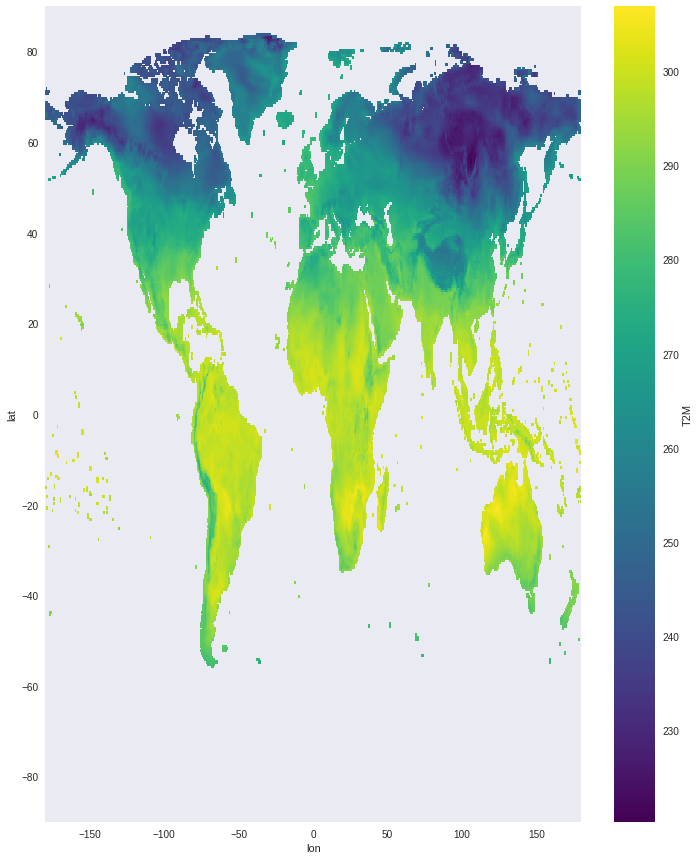

In [16]:
January_1st.mean(dim='time').plot()

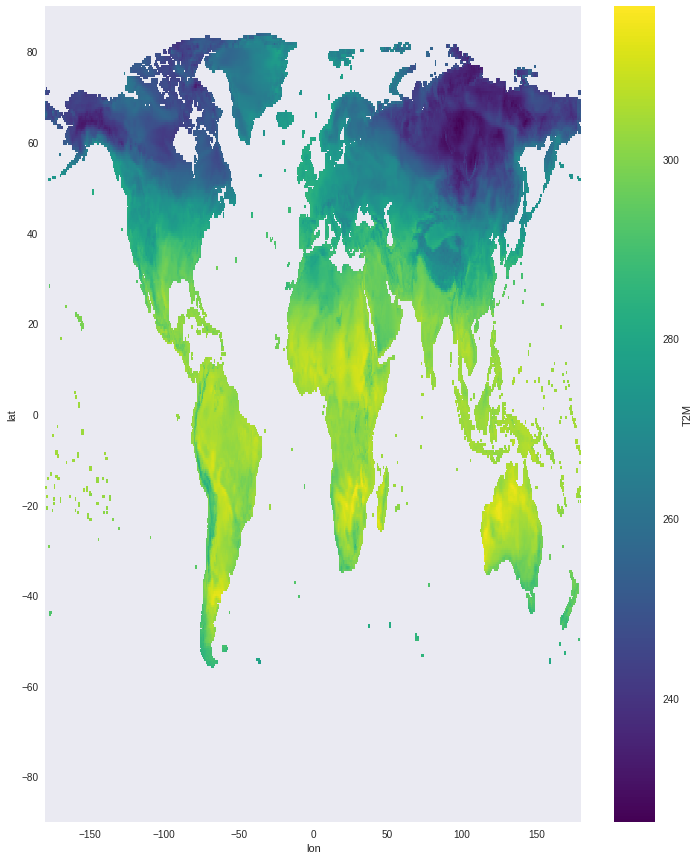

In [17]:
January_1st.max(dim='time').plot()

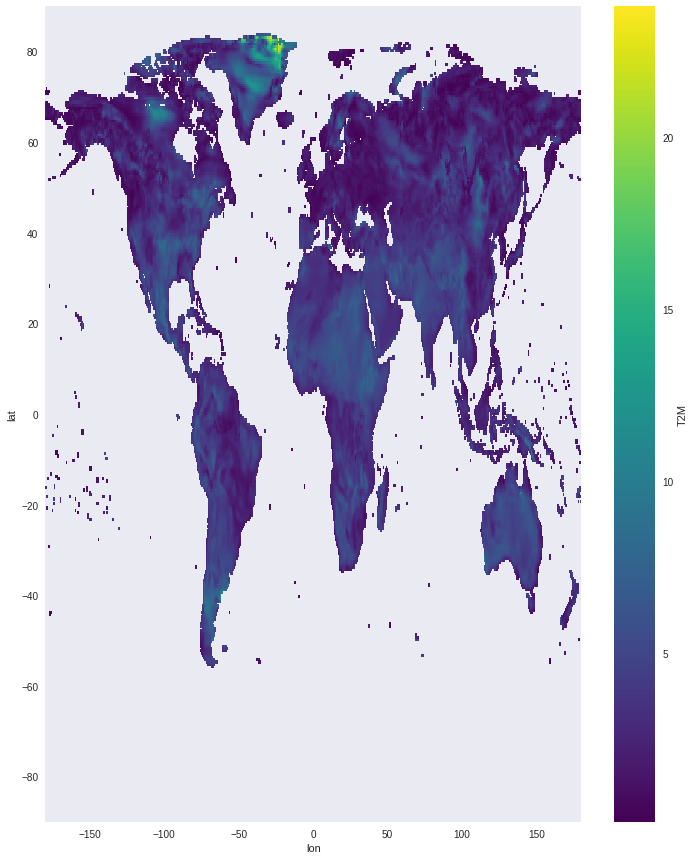

In [18]:
January_1st.std(dim='time').plot()

### Examining a dataset with Pandas and Seaborn

In [19]:
df = dset.to_dataframe()
df.head()

T2M
lat    lon     time                           
-89.75 -179.75 2000-01-01 00:29:59.971200  NaN
               2000-01-01 01:30:00.000000  NaN
               2000-01-01 02:30:00.028800  NaN
               2000-01-01 03:29:59.971200  NaN
               2000-01-01 04:30:00.000000  NaN

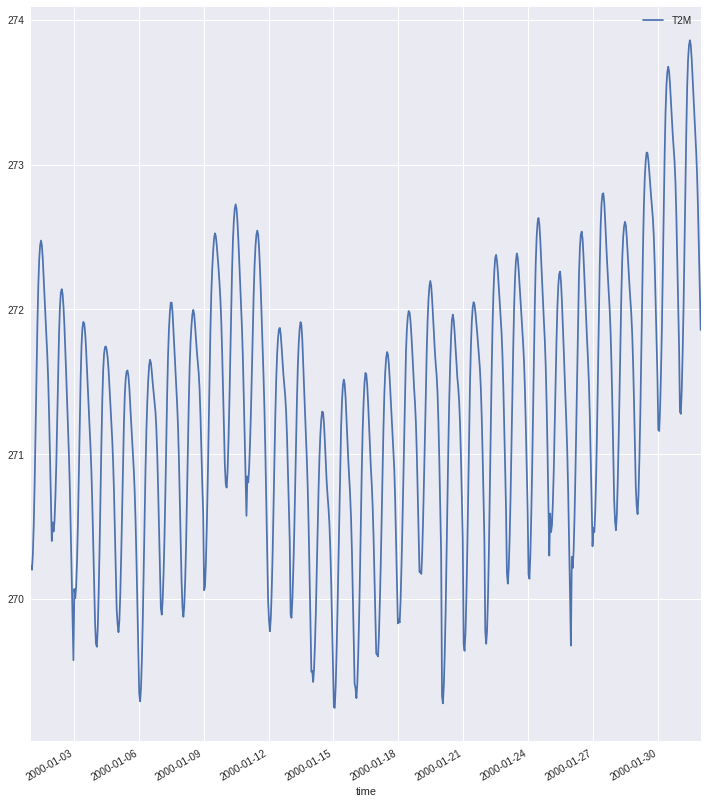

In [20]:
dset['T2M'].mean(dim=['lat', 'lon']).to_dataframe().plot()

### Probability of freeze by calendar day

In [21]:
freeze = (dset['T2M'].sel(lat=slice(0, 50), lon=slice(0,50)) <= 273.).groupby('time.day').mean('time')

In [22]:
freeze

<xarray.DataArray 'T2M' (day: 31, lat: 100, lon: 100)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ..., 
        [ 0.      ,  0.      , ...,  1.      ,  1.      ],
        [ 0.      ,  0.      , ...,  1.      ,  1.      ]],

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ..., 
        [ 0.      ,  0.      , ...,  0.75    ,  0.833333],
        [ 0.      ,  0.      , ...,  1.      ,  1.      ]],

       ..., 
       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ..., 
        [ 0.      ,  0.      , ...,  0.208333,  0.208333],
        [ 0.      ,  0.      , ...,  0.166667,  0.166667]],

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ..., 
        [ 0.      ,  0.      , ...,  0.29166

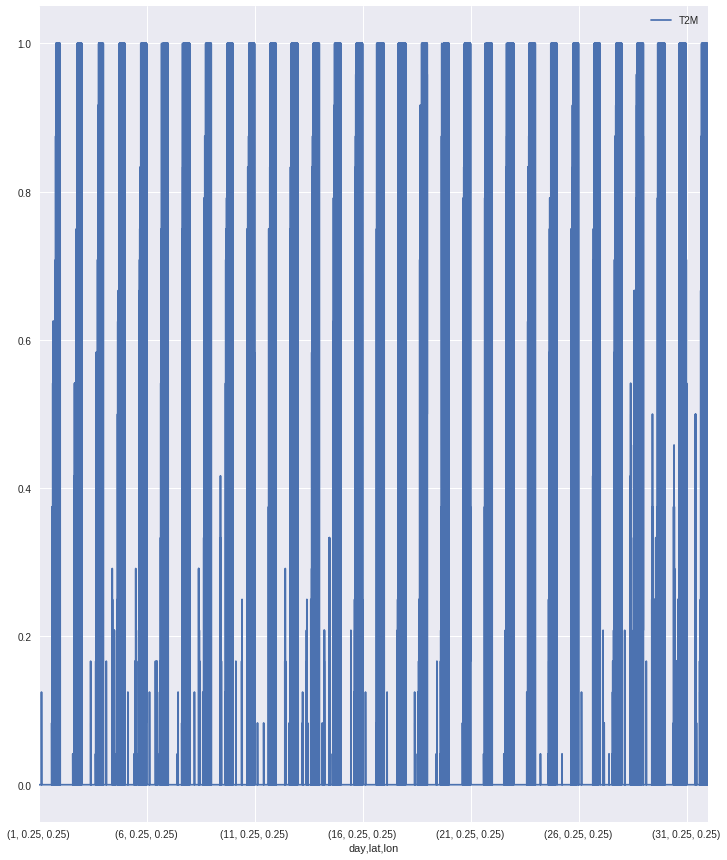

In [23]:
freeze.to_dataframe().plot()

### Daily averaging

In [24]:
daily_avg = dset.resample('D', dim='time', how='mean')

In [25]:
daily_avg

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 31)
Coordinates:
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 -177.25 ...
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
Data variables:
    T2M      (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

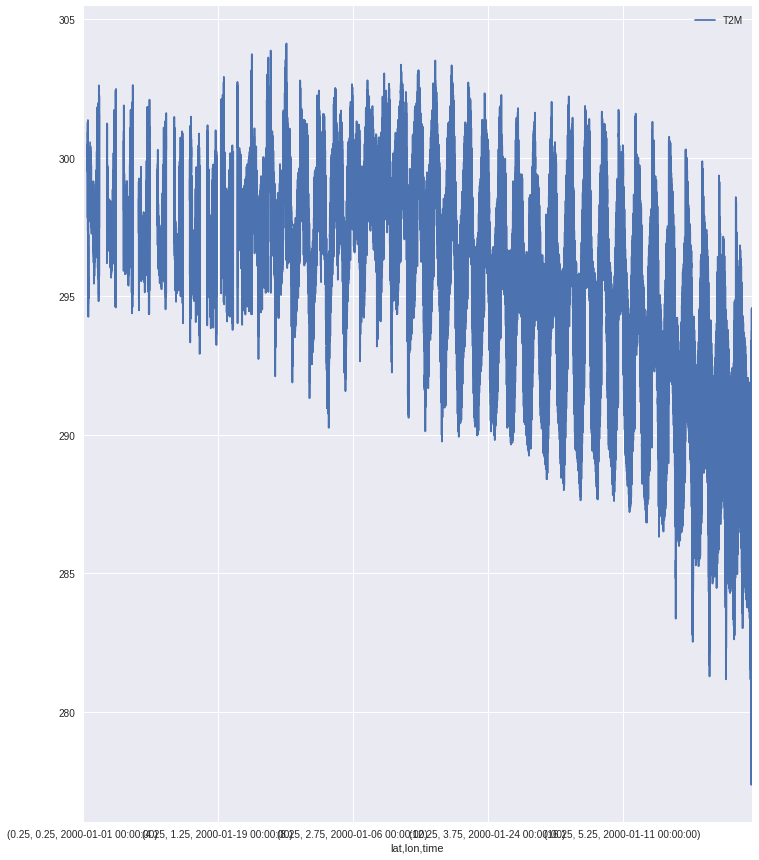

In [26]:
daily_avg.sel(lat=slice(0, 20), lon=slice(0, 20)).to_dataframe().plot()

### Calculate daily anomalies

In climatology, “anomalies” refer to the difference between observations and typical weather for a particular season. Unlike observations, anomalies should not show any seasonal cycle.

In [27]:
climatology = dset.groupby('time.day').mean('time')

In [28]:
anomalies = dset.groupby('time.day') - climatology

In [29]:
anomalies

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 744)
Coordinates:
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 -177.25 ...
  * time     (time) datetime64[ns] 2000-01-01T00:29:59.971200 ...
    day      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 ...
Data variables:
    T2M      (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

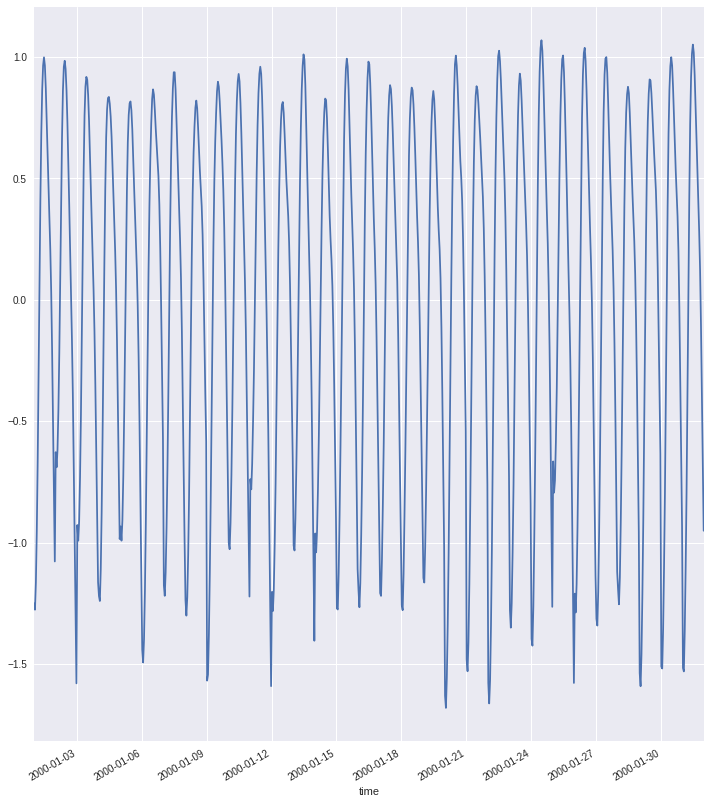

In [30]:
anomalies.mean(['lat', 'lon']).to_dataframe()['T2M'].plot()

## Key Points

xarray’s labeled dimensions enable simplified arithmetic and data aggregation, enabling many powerful shortcuts
